<a href="https://colab.research.google.com/github/nafiul-araf/Bangla-Handwritten-Digit-CNN/blob/main/Bangla_Handwritten_Digit_Recognition_using_Convolutional_Neural_Network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [ ]:
#Data Load
df_male=pd.read_csv('/content/gdrive/MyDrive/maleDigits.csv')

In [ ]:
df_female=pd.read_csv('/content/gdrive/MyDrive/maleDigits.csv')

In [ ]:
df_male.shape

(15208, 785)

In [ ]:
df_female.shape

(15622, 785)

In [ ]:
df_male.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,2,0,1,1,1,1,0,2,3,0,0,3,0,1,1,5,3,3,2,0,0,0,1,0,2,1,1,0,0,0,1,0,0,1,4,3,5,3,4,...,252,251,255,255,255,255,210,162,39,1,2,3,0,0,4,0,4,87,132,242,254,251,253,253,255,254,252,251,253,254,213,96,110,110,34,0,4,1,1,112
1,0,0,0,1,0,0,2,1,0,1,4,2,0,0,0,0,0,0,0,5,2,1,2,0,0,0,0,0,0,0,1,1,0,2,2,1,3,5,0,0,...,255,255,255,218,179,97,16,0,4,0,0,0,1,0,0,2,2,4,0,0,19,101,198,209,206,207,208,206,205,173,88,42,0,0,0,4,1,0,0,112
2,1,0,0,0,0,0,0,2,1,1,1,2,3,5,2,6,4,4,4,2,4,4,1,2,1,1,0,0,0,0,0,0,0,0,1,1,1,1,2,2,...,194,221,255,255,221,129,40,0,5,1,2,0,0,1,2,1,2,2,1,0,50,137,131,134,143,238,255,255,255,255,232,160,50,1,0,5,1,1,2,112
3,2,1,1,0,0,0,1,0,2,1,0,1,0,1,0,3,1,6,5,3,4,2,5,2,1,1,1,1,0,0,0,0,1,1,1,3,1,1,2,2,...,167,58,6,0,4,4,2,1,1,1,0,2,1,5,1,0,83,87,162,253,250,252,252,254,152,92,75,0,0,0,0,6,3,0,0,1,0,0,2,112
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,5,6,3,1,0,0,5,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,1,1,0,1,0,0,0,0,0,0,1,1,0,36,164,141,42,53,7,1,0,0,4,3,2,1,1,1,0,0,0,0,0,0,0,0,0,112


In [ ]:
df_female.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,1,0,1,0,2,4,5,0,0,0,0,0,0,0,0,0,1,1,3,1,0,1,0,0,0,0,0,1,2,2,2,5,1,0,0,33,...,255,255,255,253,253,255,255,236,96,5,1,0,0,0,0,0,1,1,0,0,0,0,1,2,4,0,0,1,77,158,184,252,254,186,155,60,0,3,1,112
1,0,0,0,0,0,1,1,4,5,0,0,0,7,4,5,4,6,7,5,5,6,3,3,1,1,0,0,0,0,1,0,0,0,0,3,0,0,59,70,33,...,255,240,221,152,66,0,3,3,1,0,1,0,0,0,0,0,3,2,2,5,0,0,23,113,149,243,250,189,129,71,15,0,0,4,4,2,1,1,1,112
2,0,0,1,0,1,0,1,0,1,1,3,3,0,0,5,4,4,6,0,0,6,1,1,1,0,1,0,0,0,0,0,0,1,1,1,2,6,2,0,0,...,255,255,217,161,91,27,0,5,1,1,0,0,0,0,1,1,3,4,0,11,81,190,223,249,250,247,205,200,179,88,30,0,0,0,5,1,0,0,0,112
3,0,0,0,0,1,0,0,0,1,2,2,4,6,0,0,13,15,18,7,0,5,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,3,...,36,14,0,0,3,2,1,0,1,0,0,0,0,1,5,0,19,102,186,241,239,199,196,117,60,17,0,0,0,0,4,2,0,0,1,0,0,0,0,112
4,2,3,12,5,14,16,15,16,5,12,3,3,24,12,10,8,11,8,12,5,19,20,1,3,17,2,11,13,2,2,0,2,0,0,0,0,1,0,1,2,...,235,157,91,26,0,0,5,2,1,0,0,0,1,0,1,4,3,0,1,37,96,135,178,214,196,145,98,35,11,0,0,0,2,3,0,0,0,0,0,112


In [ ]:
#Concatenate
df=pd.concat([df_male,df_female],axis=0)

In [ ]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,2,0,1,1,1,1,0,2,3,0,0,3,0,1,1,5,3,3,2,0,0,0,1,0,2,1,1,0,0,0,1,0,0,1,4,3,5,3,4,...,252,251,255,255,255,255,210,162,39,1,2,3,0,0,4,0,4,87,132,242,254,251,253,253,255,254,252,251,253,254,213,96,110,110,34,0,4,1,1,112
1,0,0,0,1,0,0,2,1,0,1,4,2,0,0,0,0,0,0,0,5,2,1,2,0,0,0,0,0,0,0,1,1,0,2,2,1,3,5,0,0,...,255,255,255,218,179,97,16,0,4,0,0,0,1,0,0,2,2,4,0,0,19,101,198,209,206,207,208,206,205,173,88,42,0,0,0,4,1,0,0,112
2,1,0,0,0,0,0,0,2,1,1,1,2,3,5,2,6,4,4,4,2,4,4,1,2,1,1,0,0,0,0,0,0,0,0,1,1,1,1,2,2,...,194,221,255,255,221,129,40,0,5,1,2,0,0,1,2,1,2,2,1,0,50,137,131,134,143,238,255,255,255,255,232,160,50,1,0,5,1,1,2,112
3,2,1,1,0,0,0,1,0,2,1,0,1,0,1,0,3,1,6,5,3,4,2,5,2,1,1,1,1,0,0,0,0,1,1,1,3,1,1,2,2,...,167,58,6,0,4,4,2,1,1,1,0,2,1,5,1,0,83,87,162,253,250,252,252,254,152,92,75,0,0,0,0,6,3,0,0,1,0,0,2,112
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,5,6,3,1,0,0,5,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,1,1,0,1,0,0,0,0,0,0,1,1,0,36,164,141,42,53,7,1,0,0,4,3,2,1,1,1,0,0,0,0,0,0,0,0,0,112


In [ ]:
df.shape

(30830, 785)

In [ ]:
df.label.unique()

array([112, 113, 114, 115, 116, 117, 118, 119, 120, 121])

In [ ]:
df['label'].replace({112:0,113:1,114:2,115:3,116:4,117:5,118:6,119:7,120:8,121:9},inplace=True)

In [ ]:
df.label.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,2,0,1,1,1,1,0,2,3,0,0,3,0,1,1,5,3,3,2,0,0,0,1,0,2,1,1,0,0,0,1,0,0,1,4,3,5,3,4,...,252,251,255,255,255,255,210,162,39,1,2,3,0,0,4,0,4,87,132,242,254,251,253,253,255,254,252,251,253,254,213,96,110,110,34,0,4,1,1,0
1,0,0,0,1,0,0,2,1,0,1,4,2,0,0,0,0,0,0,0,5,2,1,2,0,0,0,0,0,0,0,1,1,0,2,2,1,3,5,0,0,...,255,255,255,218,179,97,16,0,4,0,0,0,1,0,0,2,2,4,0,0,19,101,198,209,206,207,208,206,205,173,88,42,0,0,0,4,1,0,0,0
2,1,0,0,0,0,0,0,2,1,1,1,2,3,5,2,6,4,4,4,2,4,4,1,2,1,1,0,0,0,0,0,0,0,0,1,1,1,1,2,2,...,194,221,255,255,221,129,40,0,5,1,2,0,0,1,2,1,2,2,1,0,50,137,131,134,143,238,255,255,255,255,232,160,50,1,0,5,1,1,2,0
3,2,1,1,0,0,0,1,0,2,1,0,1,0,1,0,3,1,6,5,3,4,2,5,2,1,1,1,1,0,0,0,0,1,1,1,3,1,1,2,2,...,167,58,6,0,4,4,2,1,1,1,0,2,1,5,1,0,83,87,162,253,250,252,252,254,152,92,75,0,0,0,0,6,3,0,0,1,0,0,2,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,5,6,3,1,0,0,5,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,1,1,0,1,0,0,0,0,0,0,1,1,0,36,164,141,42,53,7,1,0,0,4,3,2,1,1,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=df.drop('label',axis=1)
y=df['label']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [ ]:
len(X_train),len(X_test)

(24664, 6166)

In [ ]:
X_train.shape

(24664, 784)

In [ ]:
#Reshaping
X_train,X_test=X_train.values.reshape(-1,28,28),X_test.values.reshape(-1,28,28)

In [ ]:
X_train.shape,X_test.shape

((24664, 28, 28), (6166, 28, 28))

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
print(X_train[0])

[[  1   0   1   1   3   5   6   6   0   0   6   5   1   2   2   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  1   2   2   3   4   0   0   0  46  16   0   0   2   2   2   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  1   1   4   0   0  39 128 184 240 211 139  29   3   2   2   1   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  3   2   0  31 153 247 255 255 249 255 255 178   0   4   2   1   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  5   0  65 234 255 252 250 255 255 255 248 249  99   0   3   1   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0  46 231 255 248 255 255 203 158 193 251 255 168   0   5   1   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0 122 255 250 255 180  68  20   0   5 211 255 224  36   1   2   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0 121 255 252 146   0   0   0   9   0 111 255 253  49   0   2   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0 113 254 224  10   0   7   2   4   1  67 255 248  56   0   

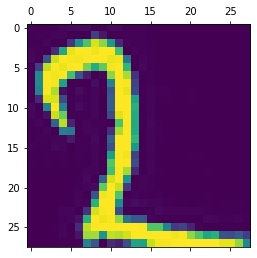

In [ ]:
plt.matshow(X_train[0])

In [ ]:
#Scaling
X_train, X_test = X_train / 255, X_test / 255

In [ ]:
print(X_train[0])

[[0.00392157 0.         0.00392157 0.00392157 0.01176471 0.01960784
  0.02352941 0.02352941 0.         0.         0.02352941 0.01960784
  0.00392157 0.00784314 0.00784314 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.00392157 0.00784314 0.00784314 0.01176471 0.01568627 0.
  0.         0.         0.18039216 0.0627451  0.         0.
  0.00784314 0.00784314 0.00784314 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.00392157 0.00392157 0.01568627 0.         0.         0.15294118
  0.50196078 0.72156863 0.94117647 0.82745098 0.54509804 0.11372549
  0.01176471 0.00784314 0.00784314 0.00392157 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.01176471 0.00784314 0.         0.12156863 0.6        0.96862745
  1.         1.         0.97647059 1.  

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train=X_train.reshape(len(X_train),28,28,1)
X_test=X_test.reshape(len(X_test),28,28,1)
X_train[0].shape

(28, 28, 1)

In [ ]:
data_aug=keras.Sequential([
                           keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(28,28,1)),
                           keras.layers.experimental.preprocessing.RandomRotation(0.1),
                           keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

In [ ]:
model=keras.Sequential([
                        data_aug,
                        keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'),
                        keras.layers.BatchNormalization(),
                        keras.layers.MaxPool2D(2,2),
                        
                        keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'),
                        keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'),
                        keras.layers.BatchNormalization(),
                        keras.layers.MaxPool2D(2,2),

                        keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'),
                        keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'),
                        keras.layers.BatchNormalization(),
                        keras.layers.MaxPool2D(2,2),
                        
                        keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_uniform'),
                        keras.layers.BatchNormalization(),
                        keras.layers.MaxPool2D(2,2),

                        keras.layers.Flatten(),
                        keras.layers.Dense(units=100,kernel_initializer='he_uniform',activation='relu'),
                        keras.layers.Dropout(0.20),
                        keras.layers.Dense(10,kernel_initializer='glorot_uniform',activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history=model.fit(X_train,y_train,epochs=100,validation_split=0.20,batch_size=100)

Epoch 1/100
198/198 [==============================] - 4s 12ms/step - loss: 1.1459 - accuracy: 0.6379 - val_loss: 0.5599 - val_accuracy: 0.8344
Epoch 2/100
198/198 [==============================] - 2s 10ms/step - loss: 0.3626 - accuracy: 0.8820 - val_loss: 0.2319 - val_accuracy: 0.9268
Epoch 3/100
198/198 [==============================] - 2s 10ms/step - loss: 0.2551 - accuracy: 0.9166 - val_loss: 0.1752 - val_accuracy: 0.9453
Epoch 4/100
198/198 [==============================] - 2s 10ms/step - loss: 0.2077 - accuracy: 0.9326 - val_loss: 0.2169 - val_accuracy: 0.9357
Epoch 5/100
198/198 [==============================] - 2s 10ms/step - loss: 0.1707 - accuracy: 0.9451 - val_loss: 0.1202 - val_accuracy: 0.9603
Epoch 6/100
198/198 [==============================] - 2s 10ms/step - loss: 0.1577 - accuracy: 0.9523 - val_loss: 0.2149 - val_accuracy: 0.9325
Epoch 7/100
198/198 [==============================] - 2s 10ms/step - loss: 0.1469 - accuracy: 0.9555 - val_loss: 0.0908 - val_accuracy:

In [ ]:
model.evaluate(X_test,y_test)

193/193 [==============================] - 1s 2ms/step - loss: 0.0672 - accuracy: 0.9875


[0.06720508635044098, 0.9875121712684631]

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)       

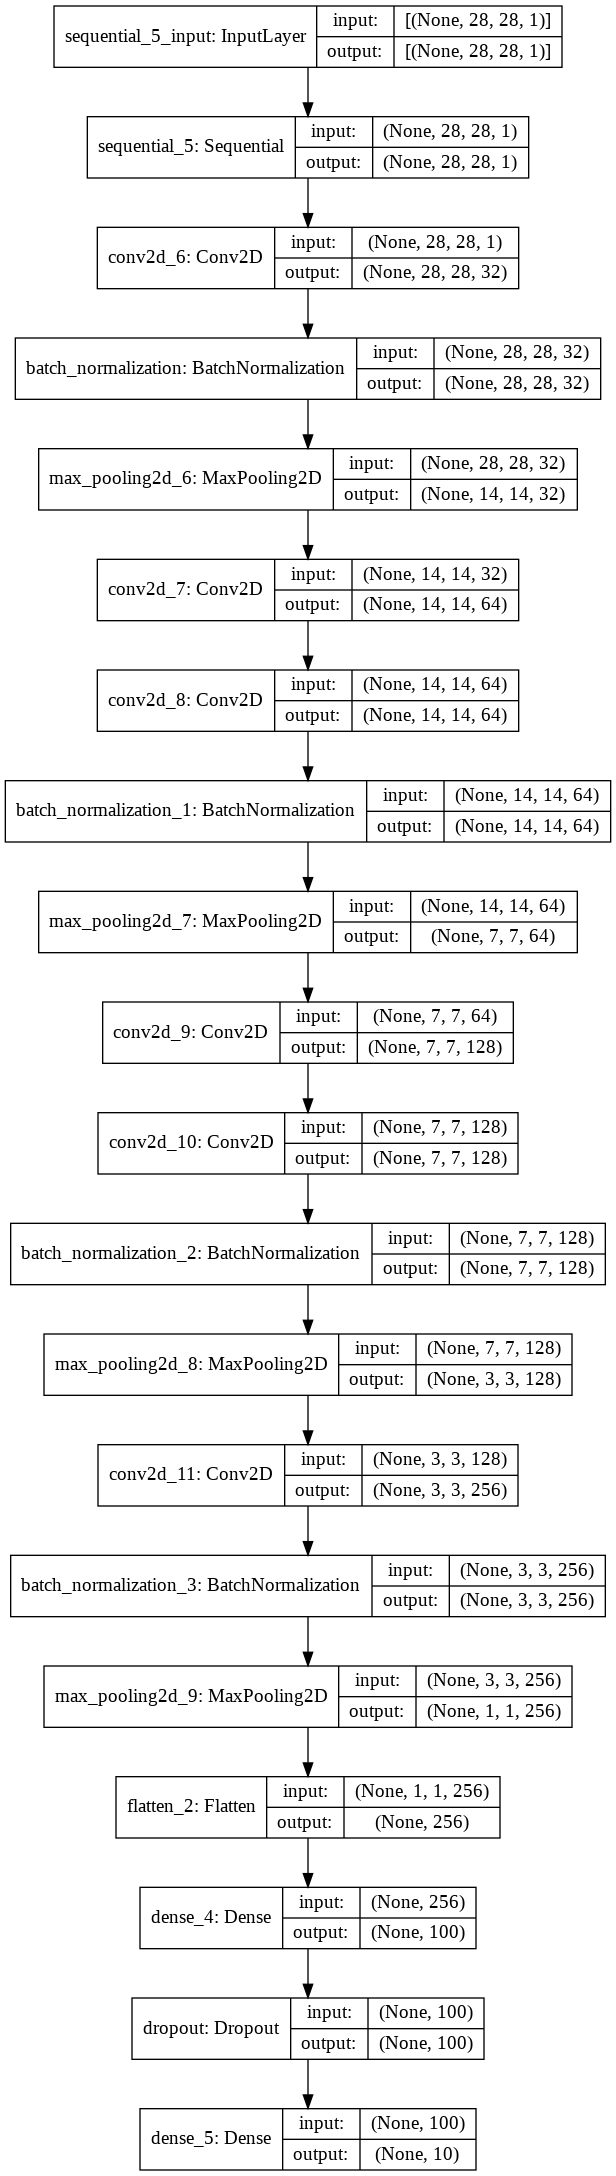

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model_plot.png',show_shapes=True,show_layer_names=True)

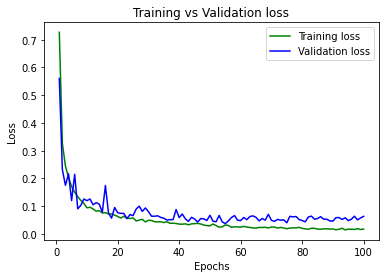

In [ ]:
loss_train=history.history['loss']
loss_val=history.history['val_loss']
epochs=range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

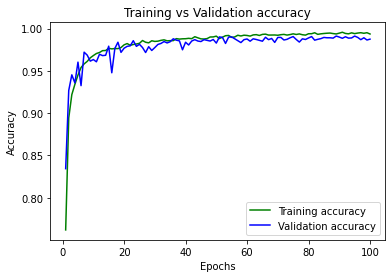

In [ ]:
loss_train=history.history['accuracy']
loss_val=history.history['val_accuracy']
epochs=range(1,101)
plt.plot(epochs,loss_train, 'g', label='Training accuracy')
plt.plot(epochs,loss_val, 'b', label='Validation accuracy')
plt.title('Training vs Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_predicted=model.predict(X_test)

In [ ]:
y_predicted[0]

array([3.9792256e-32, 9.5232973e-17, 5.5189245e-23, 9.9487509e-23,
       4.8707683e-23, 8.6212031e-22, 1.0031773e-18, 4.4136649e-18,
       5.9387000e-15, 1.0000000e+00], dtype=float32)

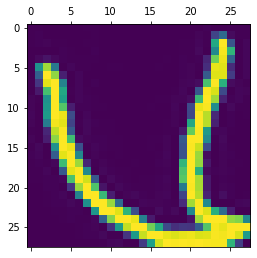

In [ ]:
X_test=X_test.reshape(-1,28,28)
plt.matshow(X_test[1])

In [ ]:
np.argmax(y_predicted[1])

6

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:10]

[9, 6, 0, 8, 3, 5, 9, 2, 4, 8]

In [ ]:
confusion_matrix=tf.math.confusion_matrix(y_test,y_predicted_labels)

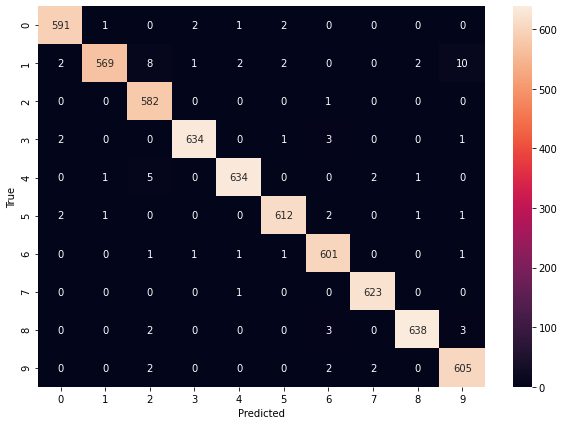

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       597
           1       0.99      0.95      0.97       596
           2       0.97      1.00      0.98       583
           3       0.99      0.99      0.99       641
           4       0.99      0.99      0.99       643
           5       0.99      0.99      0.99       619
           6       0.98      0.99      0.99       606
           7       0.99      1.00      1.00       624
           8       0.99      0.99      0.99       646
           9       0.97      0.99      0.98       611

    accuracy                           0.99      6166
   macro avg       0.99      0.99      0.99      6166
weighted avg       0.99      0.99      0.99      6166



Predicted Value is----->  9


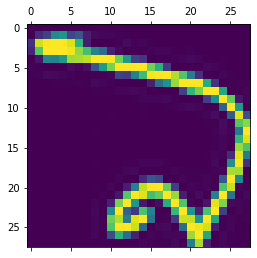

In [ ]:
plt.matshow(X_test[0])
print("Predicted Value is-----> ",y_predicted_labels[0])

Predicted Value is----->  6


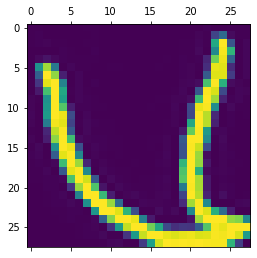

In [ ]:
plt.matshow(X_test[1])
print("Predicted Value is-----> ",y_predicted_labels[1])

Predicted Value is----->  0


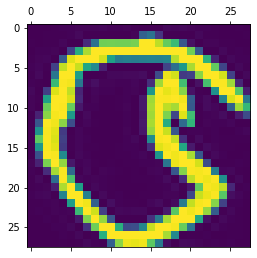

In [ ]:
plt.matshow(X_test[2])
print("Predicted Value is-----> ",y_predicted_labels[2])

Predicted Value is----->  8


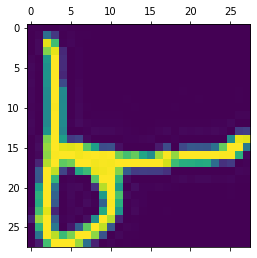

In [ ]:
plt.matshow(X_test[3])
print("Predicted Value is-----> ",y_predicted_labels[3])

Predicted Value is----->  5


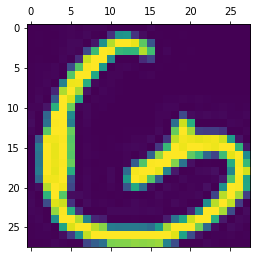

In [ ]:
plt.matshow(X_test[4])
print("Predicted Value is-----> ",y_predicted_labels[5])

Predicted Value is----->  5


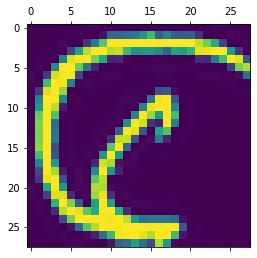

In [ ]:
plt.matshow(X_test[5])
print("Predicted Value is-----> ",y_predicted_labels[5])

Predicted Value is----->  9


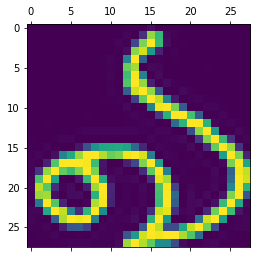

In [ ]:
plt.matshow(X_test[6])
print("Predicted Value is-----> ",y_predicted_labels[6])

Predicted Value is----->  2


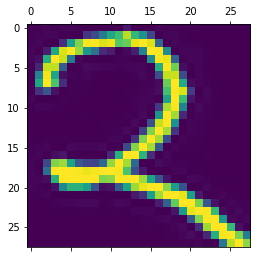

In [ ]:
plt.matshow(X_test[7])
print("Predicted Value is-----> ",y_predicted_labels[7])

Predicted Value is----->  4


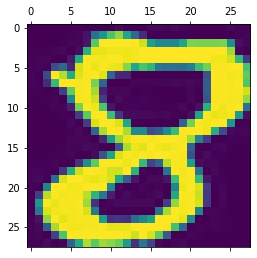

In [ ]:
plt.matshow(X_test[8])
print("Predicted Value is-----> ",y_predicted_labels[8])

Predicted Value is----->  8


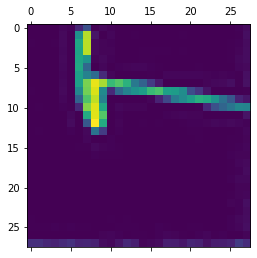

In [ ]:
plt.matshow(X_test[9])
print("Predicted Value is-----> ",y_predicted_labels[9])

In [ ]:
!pip install gradio

In [ ]:
import gradio as gd

In [ ]:
def predict(image):
  image=image.reshape(-1,28,28,1)
  image=image/255
  pred=model.predict(image)
  pred=np.argmax(pred)

  return pred

In [ ]:
interface=gd.Interface(predict,inputs='sketchpad',outputs='label',title='Bangla Handwritten Digit Recognition')

In [ ]:
interface.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://50677.gradio.app
Interface loading below...


KeyboardInterrupt: ignored